In [1]:
#The goal is to create a model to algorithmically predict if a review is positive or negative
#just based on its text. Try to see how these reviews compare across categories. 
#Does a review classification model for one category work for another?

In [77]:
import pandas as pd #To hand with data 
import numpy as np #To math 
import seaborn as sns #to visualization
import matplotlib.pyplot as plt # to plot the graphs
import matplotlib.gridspec as gridspec # to do the grid of plots
import warnings
warnings.filterwarnings("ignore")

In [78]:
import pandas as pd
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('reviews_Musical_Instruments_5.json.gz')

In [79]:
#select rows based on the overall value = 3.0
df.loc[df['overall'] == 3.0]

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
7,AJNFQI3YR6XJ5,B00004Y2UT,"Fender Guy ""Rick""","[0, 0]",I now use this cable to run from the output of...,3.0,Didn't fit my 1996 Fender Strat...,1353024000,"11 16, 2012"
12,A2NIT6BKW11XJQ,B00005ML71,Jai,"[0, 0]",If you are not use to using a large sustaining...,3.0,HAS TO GET USE TO THE SIZE,1384646400,"11 17, 2013"
59,A3LNNEYLGGCO25,B000068NW5,Hans R,"[0, 0]",Works for practice ... it's a guitar instrumen...,3.0,maybe not the best but it serves it's purpose,1404518400,"07 5, 2014"
71,A319B090A2POEB,B000068NW5,Lee,"[0, 0]",...unbalanced guitar cable is notoriously nois...,3.0,Standard guitar cable,1329004800,"02 12, 2012"
74,A2WYAHJGST6AOT,B000068NW5,Matt,"[0, 1]","It's a cable, no frills, tangles pretty easy a...",3.0,average cable,1393372800,"02 26, 2014"
76,AN73VQ17FZVJ8,B000068NW5,MJK,"[2, 2]","One end was loose, so I tightened it, it keeps...",3.0,Good for the Price,1371168000,"06 14, 2013"
93,AQG6AQXC703WD,B000068NZC,Bob,"[0, 0]","It is a decent cable. It does its job, but it ...",3.0,Does Its Job,1395792000,"03 26, 2014"
157,A2WT46GVYE1ZDD,B00006LVEU,"Charles S. Glass ""salty""","[0, 2]",Back in the 1980's I bought a can of deoxit(no...,3.0,There used to be better stuff,1381190400,"10 8, 2013"
164,A19JA9J3BFBKNO,B00006LVEU,rusty springer,"[0, 0]",I've got an old mesa boogie that has developed...,3.0,kinda worked kinda didn't,1402358400,"06 10, 2014"
179,A31XY5BETE8DUC,B00009W40G,Paul D.,"[0, 0]",These cables are a little thin compared to hos...,3.0,Thin cables...,1356480000,"12 26, 2012"


In [80]:
#create another data frame with just the columns you are interested in using for prediction
df_review = df[['reviewText', 'overall','summary']]

In [81]:
df_review.head()

,reviewText,overall,summary
0,"Not much to write about here, but it does exac...",5.0,good
1,The product does exactly as it should and is q...,5.0,Jake
2,The primary job of this device is to block the...,5.0,It Does The Job Well
3,Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY
4,This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.


In [82]:
#Let's create the y outcome variable
df_review['review_predictor'] = np.where(df_review['overall'] <=3.0,0,1)

In [83]:
df_review.groupby('review_predictor').agg(['count', 'size', 'nunique']).stack()

reviewText  overall  summary
review_predictor                                      
0                count          1239     1239     1239
                 size           1239     1239     1239
                 nunique        1239        3     1189
1                count          9022     9022     9022
                 size           9022     9022     9022
                 nunique        9016        2     7702

In [84]:
#use keywords to build predictive variables
keywords = ['Good', 'Great', 'Poor', 'Not', 'No', 'Best', 'Excellent', 'Disappoint','Waste','Problem']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matchin
    df_review[str(key)] = df_review.reviewText.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )
    df_review[str(key)] = df_review.summary.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [85]:
df_review['allcaps_reveiw'] = df.reviewText.str.isupper()
df_review['allcaps_summary'] = df.summary.str.isupper()

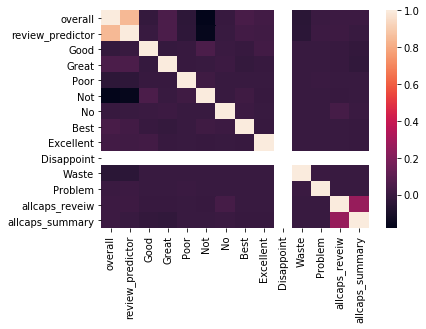

In [86]:
sns.heatmap(df_review.corr())

In [87]:
#now let's drop the summary and overall column as they are creating correations we don't need
df_review.drop(['overall','summary', 'reviewText'], axis=1, inplace=True)
#df.drop('col1', axis=1, inplace=True)

In [88]:
df_review.head()

,review_predictor,Good,Great,Poor,Not,No,Best,Excellent,Disappoint,Waste,Problem,allcaps_reveiw,allcaps_summary
0,1,False,False,False,False,False,False,False,False,False,False,False,False
1,1,False,False,False,False,False,False,False,False,False,False,False,False
2,1,False,False,False,False,False,False,False,False,False,False,False,False
3,1,False,False,False,False,False,False,False,False,False,False,False,True
4,1,False,False,False,False,False,False,False,False,False,False,False,False


In [89]:
#X = df_review[keywords + ['allcaps_review'] + ['allcaps_summary']]
y = df_review['review_predictor']
X = df_review.drop(['review_predictor'], axis=1)

In [91]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(X, y)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(X)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    X.shape[0],
    (y != y_pred).sum()))
    
#calculate the accuracy
print("Percentage accuracy {}".format((X.shape[0] - (y != y_pred).sum()) / X.shape[0]))


Number of mislabeled points out of a total 10261 points : 1245
Percentage accuracy 0.8786667966085177


In [105]:
#use built in confusion matrix to see how well the model work at predicting the variables
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred)

array([[ 132, 1107],
       [ 236, 8786]])

In [93]:
from sklearn.neighbors import KNeighborsClassifier

#instantiate the estimator (other names can be clf or and look for the 1 nearest neighbor)
knn = KNeighborsClassifier(n_neighbors=1)

from sklearn.model_selection import cross_val_score
cv_results =cross_val_score(knn, X, y, cv=5)
print('\n Percentage accuracy of X and Y cross validation results are : ', cv_results)

#fit the model with data
knn.fit(X,y)

y_pred = knn.predict(X)

#find the accuracy where KNN = 1 nearest neighbor
from sklearn.metrics import accuracy_score
print("The overall prediction accuracy score using KNN is: ", accuracy_score(y, y_pred))


 Percentage accuracy of X and Y cross validation results are :  [0.87773989 0.87043351 0.87768031 0.88060429 0.88200878]
The overall prediction accuracy score using KNN is:  0.8691160705584251


In [94]:
#Use a SVN classification model and compare if the results from knn and naive bayes see which 
#performs the best

from sklearn.svm import LinearSVC

#increasing the C parameter can improve the accuracy. I initally started with 3 and achieved 87% accuracy
#increased the parameter C to 3 with a 87% accurracy
#increased it to 7 with a 87% accurracy, notice the accuracy didn't improve much from the C parameters of 1 and 5

svc = LinearSVC(C=7)

from sklearn.model_selection import cross_val_score
cv_results =cross_val_score(svc, X, y, cv=7)
print('\n Percentage accuracy of X and Y cross validation results are : ', cv_results)

svc.fit(X, y)

#score = cross_val_score(regressor, X_test, y_test)
score = svc.score(X, y)

print("The overal prediction accuracy score using SVM is: ",score) 


 Percentage accuracy of X and Y cross validation results are :  [0.8792633  0.8792633  0.87858117 0.8744884  0.87994543 0.8792633
 0.87849829]
The overal prediction accuracy score using SVM is:  0.8792515349381151


In [95]:
#Use a decision tree classification model and compare if the results from knn and naive bayes see which 
#performs the best

from sklearn.tree import DecisionTreeClassifier

#increasing the max_depth is improving the accuracy. I initally started with 1 with a 88% accuracy
#increased 5 with a 88% accurracy
#increased it to 7 with a 88% accurracy, notice the accuracy didn't improve much from the max_depth of 5
clf = DecisionTreeClassifier(max_depth=5)

from sklearn.model_selection import cross_val_score
cv_results =cross_val_score(clf, X, y, cv=7)
print('\n Percentage accuracy of X and Y cross validation results are : ', cv_results)

clf.fit(X, y)

#score = cross_val_score(regressor, X_test, y_test)
score = clf.score(X, y)

print("The overal prediction accuracy score using decision tree classifier is: ",score) 


 Percentage accuracy of X and Y cross validation results are :  [0.8792633  0.8792633  0.88199181 0.87653479 0.87789905 0.88062756
 0.88191126]
The overal prediction accuracy score using decision tree classifier is:  0.8806159243738427


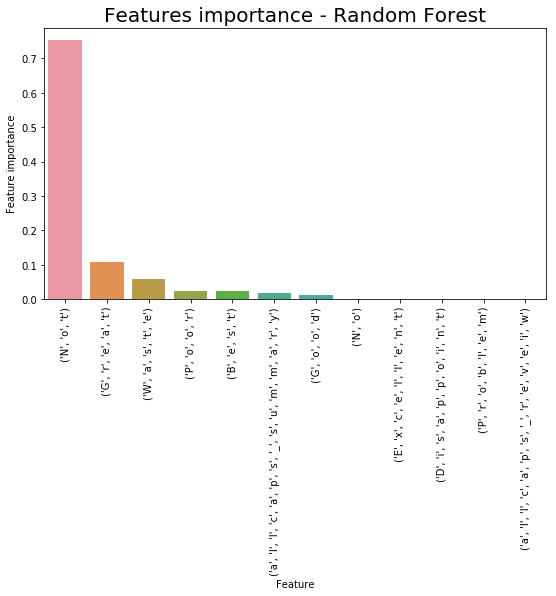

In [96]:
#Let's review the list of important features that Random forest selected.
features = X

plt.figure(figsize = (9,5))

feat_import = pd.DataFrame({'Feature': features, 'Feature importance': clf.feature_importances_})
feat_import = feat_import.sort_values(by='Feature importance',ascending=False)

g = sns.barplot(x='Feature',y='Feature importance',data=feat_import)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title('Features importance - Random Forest',fontsize=20)
plt.show() 

In [ ]:
#Overall, I am averaging an 88% accuracy with all of the models. There is clearly room for improvement
#to increase the accuracy. The first thing I would start with is identify better keywords to classify 
#the predictions more accuractly.